In [1]:
%pylab inline
from scipy import linalg

Populating the interactive namespace from numpy and matplotlib


# Inertia tensor

$I_{i,j} = \sum_{x_n V} \dfrac{x_{n}^{(i)} x_{n}^{(j)}}{d_n^2}$


In [36]:
def RIT(x, y, z, q, s):
    N = len(x)
    XYZ = zeros([3,N])
    XYZ[0,:] = x
    XYZ[1,:] = y
    XYZ[2,:] = z
    I = np.zeros([3, 3])
    for i in range(3):
        for j in range(3):
            XX = np.zeros(N)
            for n in range(N):
                d = np.sqrt(XYZ[0,n]**2 + XYZ[1,n]**2/q**2 + XYZ[2,n]**2/s**2)
                Xi = sum(XYZ[i,n])
                Xj = sum(XYZ[j,n])
                XX[n] = Xi * Xj / d**2
            I[i][j] = sum(XX)
    return I
                    

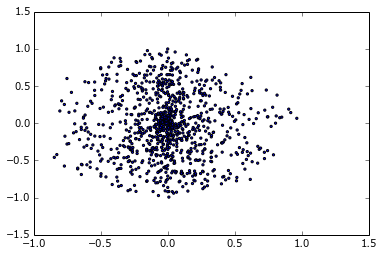

In [49]:
phi = random.rand(1000) * 2*pi
theta = random.rand(1000) * pi
R = random.rand(1000)
X = R * sin(theta) * cos(phi)
Y = R * cos(theta) * cos(phi)
Z = R * sin(phi)
scatter(X, Z, s=5)

In [50]:
I_test = RIT(X, Y, Z, 1, 1)
print I_test

[[ 242.54233108   10.62724435    0.83416059]
 [  10.62724435  258.16916722   -6.41850272]
 [   0.83416059   -6.41850272  499.28850171]]


In [52]:
diagonal(I_test)

array([ 242.54233108,  258.16916722,  499.28850171])

In [41]:
I_test = RIT(X, Y, Z, )

TypeError: RIT() takes exactly 5 arguments (3 given)

In [17]:
eig?

In [27]:
Z = zeros([2, 4])

In [28]:
Z[0,:] = x
Z[1,:] = y

In [29]:
Z

array([[  0.        ,   4.66666667,   9.33333333,  14.        ],
       [  0.        ,   0.33333333,   0.66666667,   1.        ]])